**Importing libraries**

In [384]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**DataFrame**

In [385]:
# Reading and encoding dataframe
attacks = pd.read_csv('/Users/victor/maria/ironhack_labs/attacks.csv', encoding='cp1252')
attacks_df = attacks.copy()

In [386]:
# Getting some basic info
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [387]:
# General cleaning
attacks_df.dropna(axis = 0, how = 'all', inplace = True)
attacks_df = attacks_df.rename(columns={'Sex ': 'Sex'})
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case Number'] == '0'].index)
attacks_df = attacks_df.drop(attacks_df[attacks_df['Case Number'] == 'xx'].index)

In [388]:
# New valid info
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [389]:
# Checking if there is any valid ID
print(attacks_df['Case Number'].is_unique)
print(attacks_df['original order'].is_unique)
print(attacks_df['href'].is_unique)
print(attacks_df['pdf'].is_unique)

False
False
False
False


In [390]:
# Checking there are not duplicated rows, before setting a new ID
duplicateRows = attacks_df[attacks_df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Case Number, Date, Year, Type, Country, Area, Location, Activity, Name, Sex, Age, Injury, Fatal (Y/N), Time, Species , Investigator or Source, pdf, href formula, href, Case Number.1, Case Number.2, original order, Unnamed: 22, Unnamed: 23]
Index: []

[0 rows x 24 columns]


In [391]:
# Setting a new ID
attacks_df.index = [x for x in range(1, len(attacks_df.values)+1)]
attacks_df.index.name = 'attacks_ID'

# Demographics

In [392]:
attacks_df[['Sex','Age']]

,Sex,Age
attacks_ID,,
1,F,57
2,F,11
3,M,48
4,M,NaN
5,M,NaN
...,...,...
6298,M,NaN
6299,M,NaN
6300,M,NaN


## Age

In [393]:
attacks_df.Age.describe()

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [394]:
attacks_df.Age.value_counts(dropna=False)

NaN            2831
17              154
18              150
19              142
20              141
               ... 
13 or 14          1
?    &   14       1
60s               1
81                1
20?               1
Name: Age, Length: 158, dtype: int64

We have 640 valid data in Age, let's try to rise it a little bit

In [395]:
attacks_df.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

**If we assume:**
- Teenagers are between 13 and 19; so the mean will be *16*
- Youngs are from 20 to 30; so the mean will be *25*
- Adults are from 31 to 65; so the mean is *48*
- Elderly are from 66 to 100+; the mean is around *88*

In [396]:
attacks_df['Age'] = attacks_df['Age'].astype(str)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.*$)', '37')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*onth.*$)', '1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s$', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace('nan', 'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\s&.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sor.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'(.*)\sto.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s(\d\d)', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^(\d\d).*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D*(\d\d)', r'\1')
attacks_df['Age'].replace(('\xa0', 'NaN'), inplace = True)
attacks_df['Age'] = attacks_df.Age.str.replace(r'(\d)\s\s\s.*', r'\1')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\s\s.*', r'NaN')
attacks_df['Age'] = attacks_df.Age.str.replace(r'^\D{1,}$', r'NaN')
attacks_df['Age'].replace(('2½', '25'), inplace = True)
attacks_df['Age'].replace(('6½', '65'), inplace = True)
attacks_df['Age'].fillna('NaN') 


<ipython-input-396-3d9bd2cc2b39>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*een.*$)', '16')
<ipython-input-396-3d9bd2cc2b39>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*oun.*$)', '25')
<ipython-input-396-3d9bd2cc2b39>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*dul.*$)', '48')
<ipython-input-396-3d9bd2cc2b39>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*lderl.*$)', '88')
<ipython-input-396-3d9bd2cc2b39>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Age'] = attacks_df.Age.str.replace(r'(^.*middle-a.

attacks_ID
1       57
2       11
3       48
4       48
5       48
        ..
6298    16
6299    16
6300    16
6301    16
6302    15
Name: Age, Length: 6302, dtype: object

In [397]:
attacks_df.Age.unique()

array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '69', '38',
       '55', '35', '46', '45', '14', '40', '28', '20', '24', '26', '49',
       '22', '7', '31', '17', '13', '42', '3', '8', '50', '16', '82',
       '73', '68', '51', '39', '58', '47', '61', '36', '66', '43', '9',
       '72', '59', '6', '27', '64', '23', '71', '44', '62', '63', '70',
       '1', '53', '77', '74', '5', '86', '84', 'NaN', '75', '87', '67',
       '88', '81', '78'], dtype=object)

In [398]:
attacks_df['Age'].describe()

count     6302
unique      80
top         17
freq       360
Name: Age, dtype: object

In [399]:
attacks_df.Age.value_counts(dropna=False)

17    360
16    330
18    329
19    309
15    276
     ... 
81      1
84      1
86      1
67      1
88      1
Name: Age, Length: 80, dtype: int64

In [400]:
attacks_df.Age.value_counts(normalize=True).head(15)

17    0.057125
16    0.052364
18    0.052206
19    0.049032
15    0.043796
20    0.043637
22    0.039194
21    0.037607
13    0.033481
24    0.028880
14    0.028404
30    0.026817
26    0.025389
23    0.024595
27    0.024595
Name: Age, dtype: float64

In [401]:
num_age = pd.to_numeric(attacks_df['Age'], errors = 'coerce')
print('Age mean is: ', num_age.mean())
print('Age median is: ', num_age.median())
print('Age mode is: ', num_age.mode())

Age mean is:  26.16199426568971
Age median is:  22.0
Age mode is:  0    17.0
dtype: float64


## Sex

In [402]:
attacks_df.Sex.describe()

count     5737
unique       6
top          M
freq      5094
Name: Sex, dtype: object

In [403]:
attacks_df.Sex.value_counts(dropna=False)

M      5094
F       637
NaN     565
N         2
M         2
.         1
lli       1
Name: Sex, dtype: int64

In [404]:
attacks_df.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [405]:
attacks_df['Sex'].replace(('lli', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('N', 'NaN'), inplace = True)
attacks_df['Sex'].replace(('.', 'NaN'), inplace = True)
attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')
attacks_df['Sex'].fillna('NaN') 

<ipython-input-405-c8966c2c3475>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Sex'] = attacks_df.Sex.str.replace(r'^(M)\s$', r'\1')


attacks_ID
1       F
2       F
3       M
4       M
5       M
       ..
6298    M
6299    M
6300    M
6301    M
6302    M
Name: Sex, Length: 6302, dtype: object

In [406]:
attacks_df.Sex.unique()

array(['F', 'M', nan], dtype=object)

In [407]:
attacks_df.Sex.value_counts(normalize=True)

M    0.888773
F    0.111227
Name: Sex, dtype: float64

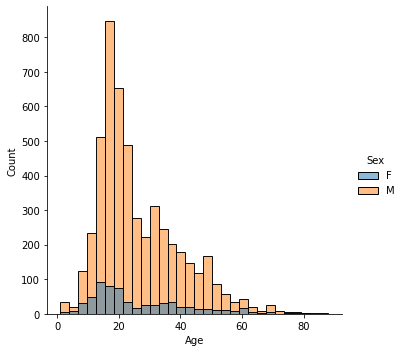

In [408]:
ages = num_age.sort_values()
sns.displot(x = ages, 
            hue = attacks_df.Sex,
           bins = 30);

> Top model 1: __Demographics__

>_Procedure_
>- General dataframe cleaning (empty rows, rename columns, setting an autoincremental ID)
>    - Finally we have 6302 informative cases to work with
>- Cleaning Age series (from 3471 filled rows distribution in 157 unique values, to non-empty cells, normalizing the values to 80 unique values)
>- Cleaning Sex series (from 5737 filled rows distributed in 6 unique values, to non-empty cells in two unique values)
 
>_Conclusions_
>- Most victicms of shark attacks were men (88%), predominantly teenagers or youngs, around to 22 y.o. in both sexs.


# Space-time Statistics

In [372]:
attacks_df[['Date','Location', 'Country', 'Area']]

,Date,Location,Country,Area
attacks_ID,,,,
1,25-Jun-2018,"Oceanside, San Diego County",USA,California
2,18-Jun-2018,"St. Simon Island, Glynn County",USA,Georgia
3,09-Jun-2018,"Habush, Oahu",USA,Hawaii
4,08-Jun-2018,Arrawarra Headland,AUSTRALIA,New South Wales
5,04-Jun-2018,La Ticla,MEXICO,Colima
...,...,...,...,...
6298,Before 1903,Roebuck Bay,AUSTRALIA,Western Australia
6299,Before 1903,NaN,AUSTRALIA,Western Australia
6300,1900-1905,Ocracoke Inlet,USA,North Carolina


## Date

In [373]:
attacks_df.Date.describe()

count     6302
unique    5433
top       1957
freq        11
Name: Date, dtype: object

In [374]:
attacks_df.Date.value_counts(dropna=False)

1957           11
1942            9
1956            8
1950            7
1958            7
               ..
12-Nov-1977     1
18-Jun-2006     1
04-Jun-2017     1
04-Dec-1963     1
29-Jan-1966     1
Name: Date, Length: 5433, dtype: int64

In [375]:
attacks_df.Date.sort_values(ascending=False)

attacks_ID
6272       World War II
6273       World War II
4803      Woirld War II
3445        Winter 1969
4722        Winter 1942
             ...       
652         22-Jul-2013
3405        16-Jan-1970
4850        15-Jun-1937
1175        10-Jan-2009
4426     \n1951.12.15.R
Name: Date, Length: 6302, dtype: object

In [376]:
# In order to know the general tendence of the attacks, we decide to get the year
attacks_df['Date'] = attacks_df['Date'].astype(str)
attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*(\d\d\d\d).*', r'\1')
attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*\D(\d\d\d)\D.*', r'\1')
attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*ar.*', '1939')
attacks_df['Date'].replace(('No date', 'NaN'), inplace = True)
attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*B.C.*', '0')
attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*A.D.*', '0')
attacks_df['Date'].replace(('\n1951.12.15.R', '1951'), inplace = True)
attacks_df['Date'].replace(('22-Jul-144', 'NaN'), inplace = True)
attacks_df['Date'].replace(('Reported 26-Sep-t937', 'NaN'), inplace = True)
attacks_df['Date'].fillna('NaN') 

<ipython-input-376-7bb4f6f3b23d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*(\d\d\d\d).*', r'\1')
<ipython-input-376-7bb4f6f3b23d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*\D(\d\d\d)\D.*', r'\1')
<ipython-input-376-7bb4f6f3b23d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*ar.*', '1939')
<ipython-input-376-7bb4f6f3b23d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r'^.*B.C.*', '0')
<ipython-input-376-7bb4f6f3b23d>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Date'] = attacks_df.Date.str.replace(r

attacks_ID
1       2018
2       2018
3       2018
4       2018
5       2018
        ... 
6298    1903
6299    1903
6300    1905
6301    1889
6302    1853
Name: Date, Length: 6302, dtype: object

In [377]:
attacks_df.Date.unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2008', '2010', '2009', '2006', '2007', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1954',
       '1963', '1962', '1961', '1960', '1959', '1764', '1958', '1957',
       '1956', '1955', '9955', '1953', '1952', '1950', '1949', '1948',
       '1848', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
      

In [378]:
attacks_df.Date.value_counts(normalize=True)

2015    0.022691
2017    0.021739
2016    0.020787
2011    0.020470
2014    0.020311
          ...   
1751    0.000159
1738    0.000159
1815    0.000159
500     0.000159
1822    0.000159
Name: Date, Length: 254, dtype: float64

In [379]:
attacks_df.Date.describe()

count     6302
unique     254
top       2015
freq       143
Name: Date, dtype: object

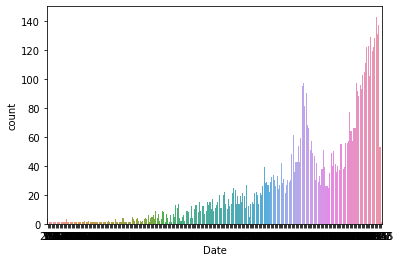

In [335]:
years_ = pd.to_numeric(attacks_df['Date'], errors = 'coerce')
years = years_.sort_values()

sns.countplot(x = years);

## Location

In [380]:
attacks_df.Location.describe()

count                                 5762
unique                                4108
top       New Smyrna Beach, Volusia County
freq                                   163
Name: Location, dtype: object

In [381]:
attacks_df.Location.value_counts(dropna=False)

NaN                                                        540
New Smyrna Beach, Volusia County                           163
Daytona Beach, Volusia County                               30
Ponce Inlet, Volusia County                                 20
Melbourne Beach, Brevard County                             18
                                                          ... 
Winterhaven Park,           Ponce Inlet, Volusia County      1
Georgetown County                                            1
Van Ness Municipal Pier, San Francisco                       1
Tenth Island (King Island)                                   1
Sandy Bay/Whananaki                                          1
Name: Location, Length: 4109, dtype: int64

In [382]:
# There are so many unique values, it's necessary to group them, or use the Area/Country instead the Location
new_Location = attacks_df.Location.str.extract(r'(?P<Beach>.+),(?P<County>.+)')[['County', 'Beach']]

In [339]:
new_Location.County.describe()

count                2795
unique                838
top        Volusia County
freq                  295
Name: County, dtype: object

In [340]:
attacks_df.Area.describe()

count        5847
unique        825
top       Florida
freq         1037
Name: Area, dtype: object

In [341]:
attacks_df.Country.describe()

count     6252
unique     212
top        USA
freq      2229
Name: Country, dtype: object

In [342]:
attacks_df.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [343]:
attacks_df['Country'].replace(('nan', 'NaN'), inplace = True)
attacks_df['Country'].fillna('NaN')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*BRITISH*.', 'UNITED KINGDOM')
attacks_df['Country'].replace(('PALESTINIAN TERRITORIES', 'PALESTINA'), inplace = True)
attacks_df['Country'] = attacks_df.Country.str.replace(r'.*TURKS*.', 'TURKEY')
attacks_df['Country'].replace(('UNITED ARAB EMIRATES (UAE)', 'UNITED ARAB EMIRATES'), inplace = True)
attacks_df['Country'].replace(('GULF OF ADEN', 'SOMALIA'), inplace = True)
attacks_df['Country'].replace(('ST. MAARTIN', 'NETHERLANDS'), inplace = True)
attacks_df['Country'].replace(('CEYLON (SRI LANKA)', 'SRI LANKA'), inplace = True)


<ipython-input-343-3ada7e76a166>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)\s/.*', r'\1')
<ipython-input-343-3ada7e76a166>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^(.*)?', r'\1')
<ipython-input-343-3ada7e76a166>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'^Between\s(.*)\s.*', r'\1')
<ipython-input-343-3ada7e76a166>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Country'] = attacks_df.Country.str.replace(r'.*British*.', 'UNITED KINGDOM')
<ipython-input-343-3ada7e76a166>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks_df['Coun

In [344]:
attacks_df.Country.describe()

count     6252
unique     199
top        USA
freq      2235
Name: Country, dtype: object

In [383]:
attacks_df.corr()

,Year,original order
Year,1.000000,0.388638
original order,0.388638,1.000000


> Top model 2: __Space-time statistics__

>_Procedure_
>- Cleaning Date series (we start with 5433 different values, and decide to reduce it to the years in order to have a view of the general tendence, getting 254 unique values)
>- Cleaning Location series 
 
>_Conclusions_


In [99]:
'''
2. Toy model 2: space-time statistics
   1. Focus on date and location columns
   2. Choose a cleaning strategy
   3. Extract statistics and draw at least two graphs that are insightful
   4. Report your procedure and conclusions with a paragraph
'''

'\n2. Toy model 2: space-time statistics\n   1. Focus on date and location columns\n   2. Choose a cleaning strategy\n   3. Extract statistics and draw at least two graphs that are insightful\n   4. Report your procedure and conclusions with a paragraph\n'